In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline


In [2]:
import statsmodels.api as sm
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
import pydotplus
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from sklearn.model_selection import cross_val_score
import timeit
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import my data
df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\music.csv')
pd.options.display.max_columns = None
df.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [4]:
print (df.isna().sum())

artist.hotttnesss               0
artist.id                       0
artist.name                     0
artist_mbtags                6289
artist_mbtags_count             0
bars_confidence                 0
bars_start                      0
beats_confidence                0
beats_start                     0
duration                        0
end_of_fade_in                  0
familiarity                     4
key                             0
key_confidence                  0
latitude                        0
location                        0
longitude                       0
loudness                        0
mode                            0
mode_confidence                 0
release.id                      0
release.name                    0
similar                         1
song.hotttnesss              4351
song.id                         0
start_of_fade_out               0
tatums_confidence               0
tatums_start                    0
tempo                           0
terms         

In [5]:

#Remove column with missing entries
df = df.drop(['artist_mbtags'], axis=1)

In [6]:
# this will take care of all the int or float columns
df = df.fillna(df.mean()) 

# This takes care of the Nan in 'artist_mbtags'
df['similar'] = df['similar'].fillna(df['similar'].mode()[0])
df['terms'] = df['terms'].fillna(df['terms'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])

df['song_hotttnesss'] = np.where(df['song.hotttnesss'] >= 0.5, 1, 0)


In [7]:
Q1 = df['loudness'].quantile(0.25) 
Q3 = df['loudness'].quantile(0.75) 
IQR = Q3 - Q1 
cut_num = Q1 - 1.5 * IQR 
cut_num2 = Q3 + 1.5 * IQR 
def cut(x, cut_num):   
        cut_num = -10   
        if x < cut_num:      
            x = cut_num   
        else:     
                x = x   
        return x  
    
df['loudness'] = df['loudness'].apply(lambda x: cut_num if x<cut_num else x ) 
df['loudness'] = df['loudness'].apply(lambda x: cut_num2 if x > cut_num2 else x)

In [8]:
Q1 = df['duration'].quantile(0.25) 
Q3 = df['duration'].quantile(0.75) 
IQR = Q3 - Q1 
cut_num = Q1 - 1.5 * IQR 
cut_num2 = Q3 + 1.5 * IQR 
def cut(x, cut_num):   
        cut_num = -10   
        if x < cut_num:      
            x = cut_num   
        else:     
                x = x   
        return x  
    
df['duration'] = df['duration'].apply(lambda x: cut_num if x<cut_num else x ) 
df['duration'] = df['duration'].apply(lambda x: cut_num2 if x > cut_num2 else x)

In [9]:
print (df.isna().sum(), df.dtypes)

artist.hotttnesss            0
artist.id                    0
artist.name                  0
artist_mbtags_count          0
bars_confidence              0
bars_start                   0
beats_confidence             0
beats_start                  0
duration                     0
end_of_fade_in               0
familiarity                  0
key                          0
key_confidence               0
latitude                     0
location                     0
longitude                    0
loudness                     0
mode                         0
mode_confidence              0
release.id                   0
release.name                 0
similar                      0
song.hotttnesss              0
song.id                      0
start_of_fade_out            0
tatums_confidence            0
tatums_start                 0
tempo                        0
terms                        0
terms_freq                   0
time_signature               0
time_signature_confidence    0
title   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
artist.hotttnesss            10000 non-null float64
artist.id                    10000 non-null object
artist.name                  10000 non-null object
artist_mbtags_count          10000 non-null float64
bars_confidence              10000 non-null float64
bars_start                   10000 non-null float64
beats_confidence             10000 non-null float64
beats_start                  10000 non-null float64
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
familiarity                  10000 non-null float64
key                          10000 non-null float64
key_confidence               10000 non-null float64
latitude                     10000 non-null float64
location                     10000 non-null object
longitude                    10000 non-null float64
loudness                     10000 non-null float64
mode       

Text(0.5, 1.0, 'Histogram of Song Hotness')

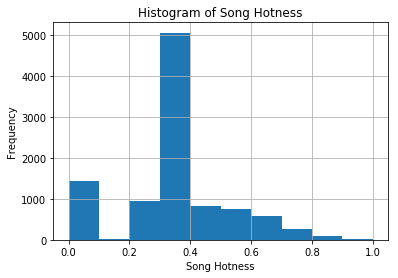

In [11]:
#Histogram of target variable
df['song.hotttnesss'].hist()
plt.xlabel('Song Hotness')
plt.ylabel('Frequency')
plt.title('Histogram of Song Hotness')

Text(0.5, 1.0, 'Histogram of Log of Song Hotness')

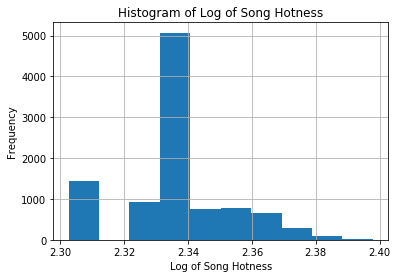

In [12]:
#The log of song hotness
song_hot_log = np.log(df['song.hotttnesss'] + 10)
song_hot_log.hist()
plt.xlabel('Log of Song Hotness')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Song Hotness')

In [13]:
key = df['key']


In [14]:
key = key.reset_index()

In [15]:
key = key[(key<13)]
key.head()

,index,key
0,0.0,1.0
1,1.0,6.0
2,2.0,8.0
3,3.0,0.0
4,4.0,2.0


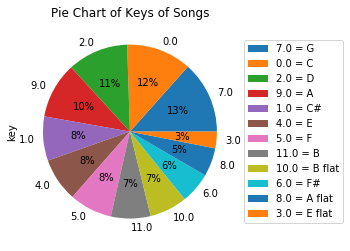

In [16]:
#Finding the frequency each musical key is used
key.key.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Pie Chart of Keys of Songs')

labels = ['7.0 = G', '0.0 = C', '2.0 = D', '9.0 = A', '1.0 = C#', '4.0 = E', '5.0 = F', '11.0 = B', '10.0 = B flat', '6.0 = F#', '8.0 = A flat', '3.0 = E flat']
plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [17]:
#Numeric Features
numeric = df.select_dtypes(exclude = ['object'])

#Object features
obj = df.select_dtypes(include = ['object'])

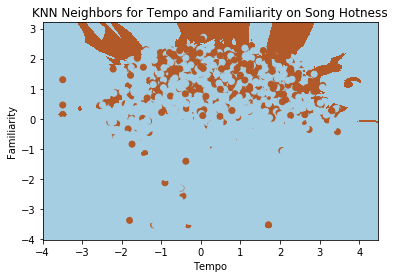

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'tempo': stats.zscore(df.tempo),
    'familiarity': stats.zscore(df.familiarity)
})

# Fit our model.
Y = df['song_hotttnesss']
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Tempo')
plt.ylabel('Familiarity')
plt.title('KNN Neighbors for Tempo and Familiarity on Song Hotness')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [19]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df.drop('song_hotttnesss', 1)
Y = df['song_hotttnesss']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.93606394, 0.89310689, 0.92107892, 0.965     , 0.936     ,
       0.924     , 0.966     , 0.88688689, 0.93193193, 0.91091091])

In [20]:
music = df[['song_hotttnesss','artist.hotttnesss', 'familiarity', 'duration', 'key', 'loudness', 'year', 'tempo']]
music.head()

,song_hotttnesss,artist.hotttnesss,familiarity,duration,key,loudness,year,tempo
0,1,0.401998,0.581794,218.93179,1.0,-11.197,0,92.198
1,0,0.417500,0.630630,148.03546,6.0,-9.843,1969,121.274
2,0,0.343428,0.487357,177.47546,8.0,-9.689,0,100.070
3,0,0.454231,0.630382,233.40363,0.0,-9.013,1982,119.293
4,1,0.401724,0.651046,209.60608,2.0,-4.501,2007,129.738


In [21]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    X = music.drop('song_hotttnesss', 1)
    Y = music['song_hotttnesss']
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Good', 'Bad'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Decision Tree Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Decision Tree Depth: 1
Model Performance: 82.87%.

Decision Tree Depth: 2
Model Performance: 82.87%.

Decision Tree Depth: 3
Model Performance: 82.34%.

Decision Tree Depth: 4
Model Performance: 83.00%.

Decision Tree Depth: 5
Model Performance: 82.65%.

Decision Tree Depth: 6
Model Performance: 82.67%.

Decision Tree Depth: 7
Model Performance: 82.79%.

Decision Tree Depth: 8
Model Performance: 82.30%.

Decision Tree Depth: 9
Model Performance: 82.24%.

Decision Tree Depth: 10
Model Performance: 81.32%.

--- Runtime: 77.82817390000002 seconds. ---


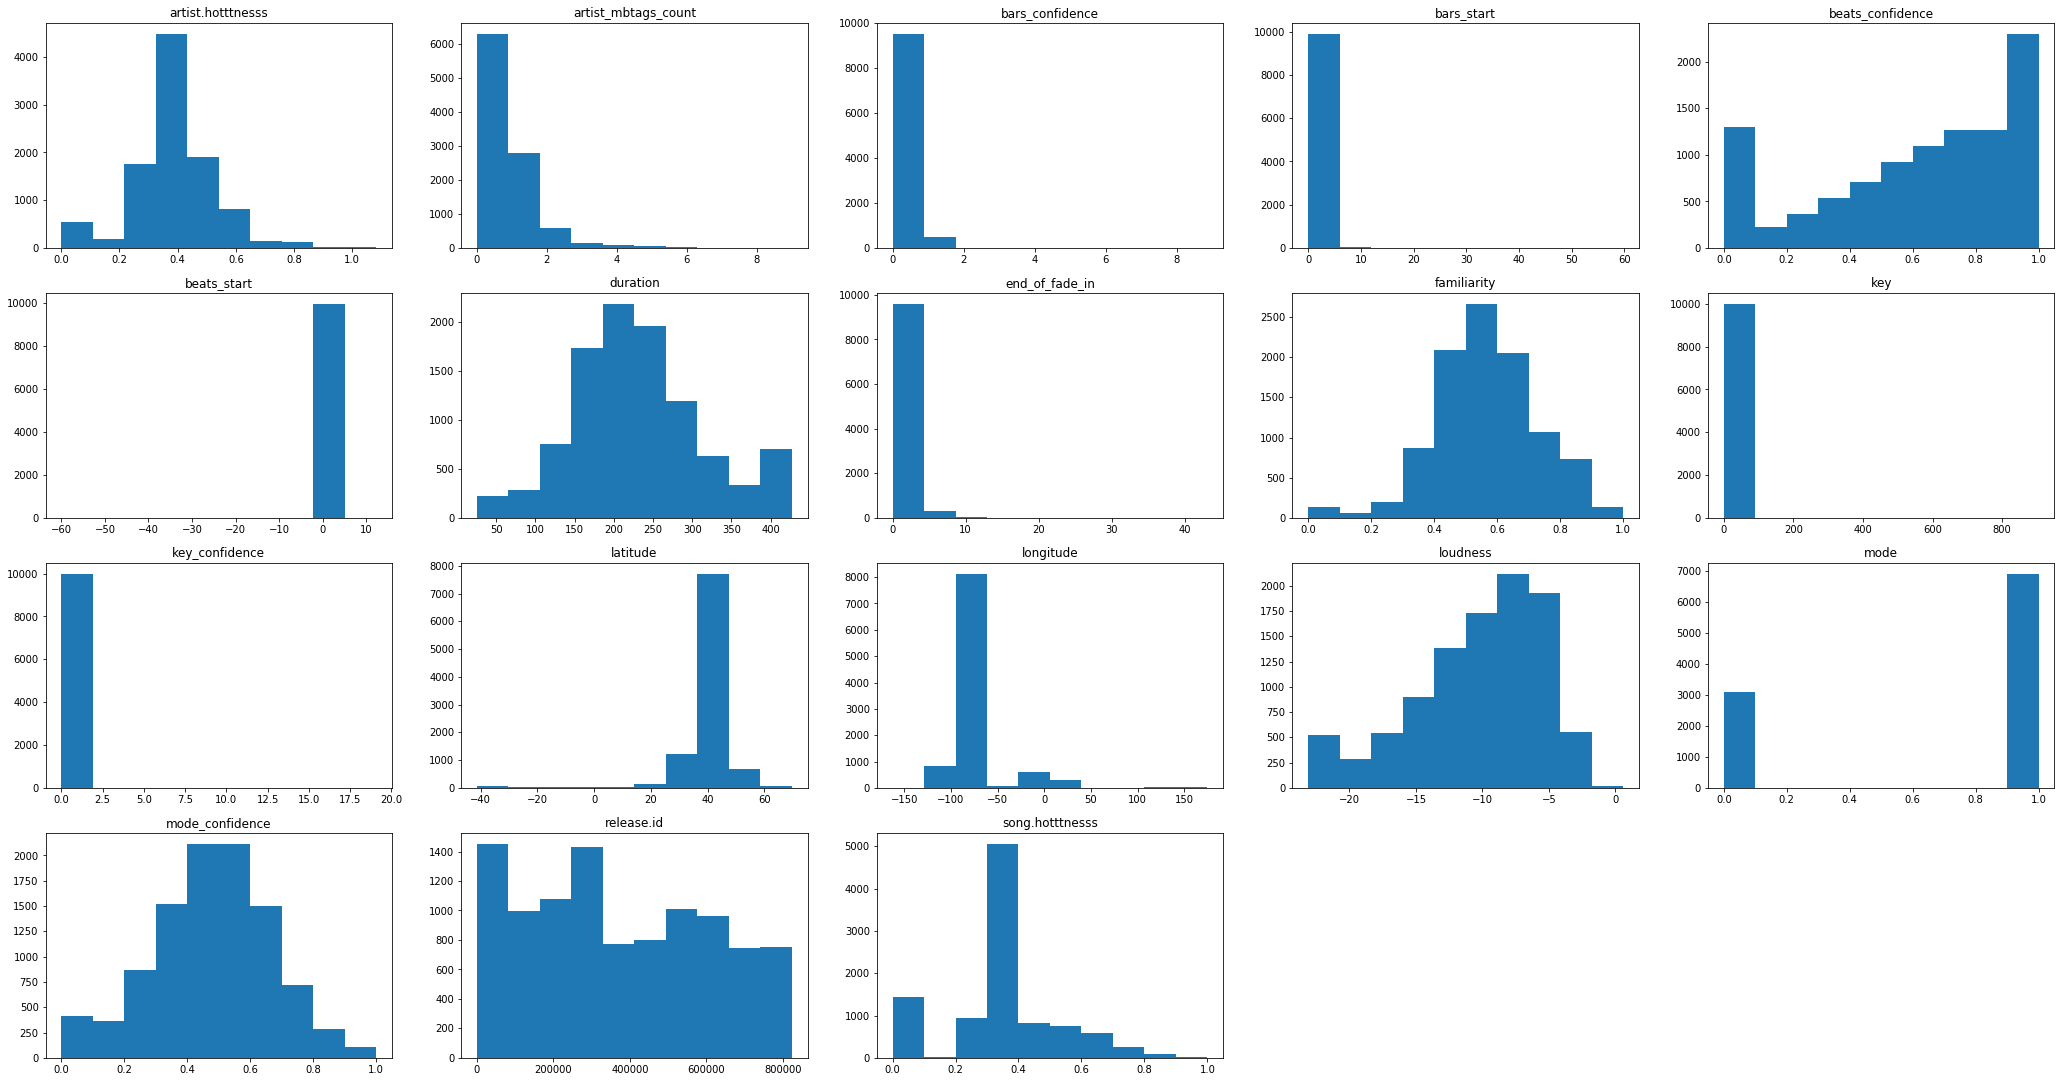

In [22]:
import itertools 
import matplotlib.gridspec as gridspec

label = numeric.columns.tolist() # 18 
clf_list = list(range(0, 18) ) 

fig = plt.figure(figsize=(36, 24)) 
gs = gridspec.GridSpec(5, 5) 
grid = itertools.product([0,1, 2, 3, 4 ],repeat=2)

print (grid)

for clf, label, grd in zip(clf_list, label, grid):

 #plt.subplot(3, 3, 3)
 ax = plt.subplot(gs[grd[0], grd[1]])
 plt.hist(numeric[label])
 plt.title(label)

plt.show()


In [23]:
from sklearn import preprocessing
obj0 = obj.apply(preprocessing.LabelEncoder().fit_transform)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

obj1 = scaler.fit_transform(obj0)
obj2 = pd.DataFrame(obj1)


print(obj2.head())

          0         1         2         3         4         5         6  \
0 -0.568257 -1.200206 -1.818560 -0.766981  1.205503  0.121417  0.006727   
1  0.397776  1.249813 -0.058316 -0.960125  0.983171 -1.380964 -1.404991   
2  0.232170  1.064861  0.451228 -0.166727 -0.331387  1.464795  1.209015   
3 -1.061513 -1.677932 -0.340460 -0.704076 -1.353145  0.161600  0.867720   
4  1.515170 -0.502899  0.451228  0.188552  1.111954 -0.892179  0.852207   

          7  
0 -0.463082  
1  0.946452  
2 -1.566491  
3  0.928234  
4 -0.834219  


In [24]:
df = pd.concat([numeric, obj2], axis = 1)
df.head()

,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,longitude,loudness,mode,mode_confidence,release.id,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,time_signature,time_signature_confidence,year,song_hotttnesss,0,1,2,3,4,5,6,7
0,0.401998,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,-63.933358,-11.197,0,0.636,300848,0.602120,218.932,0.779,0.28519,92.198,1.000000,4.0,0.778,0,1,-0.568257,-1.200206,-1.818560,-0.766981,1.205503,0.121417,0.006727,-0.463082
1,0.417500,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,-90.048920,-9.843,0,0.430,300822,0.342761,137.915,0.969,0.20627,121.274,1.000000,4.0,0.384,1969,0,0.397776,1.249813,-0.058316,-0.960125,0.983171,-1.380964,-1.404991,0.946452
2,0.343428,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,-63.933358,-9.689,1,0.565,514953,0.342761,172.304,0.482,0.42132,100.070,1.000000,1.0,0.000,0,0,0.232170,1.064861,0.451228,-0.166727,-0.331387,1.464795,1.209015,-1.566491
3,0.454231,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,-63.933358,-9.013,1,0.749,287650,0.342761,217.124,0.601,0.56254,119.293,0.988584,4.0,0.000,1982,0,-1.061513,-1.677932,-0.340460,-0.704076,-1.353145,0.161600,0.867720,0.928234
4,0.401724,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,-63.933358,-4.501,1,0.371,611336,0.604501,198.699,1.000,0.13576,129.738,0.887288,4.0,0.562,2007,1,1.515170,-0.502899,0.451228,0.188552,1.111954,-0.892179,0.852207,-0.834219


In [25]:
y = df['song_hotttnesss']
X = df.loc[:, df.columns.isin(['artist.hotttnesss','tempo', 'loudness', 'familiarity', 'key', 'duration','time_signature','year'])]
#X = df.loc[:, df.columns != 'song_hotttnesss']
#X = X.drop('song.hotttnesss', axis=1)


# Make the categorical variable 'country' into dummies.
#X = pd.concat([X, pd.get_dummies(df['location'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

print(X_train.head())

print(y_train.head())

   artist.hotttnesss   duration  familiarity  key  loudness    tempo  \
0           0.401998  218.93179     0.581794  1.0   -11.197   92.198   
1           0.417500  148.03546     0.630630  6.0    -9.843  121.274   
2           0.343428  177.47546     0.487357  8.0    -9.689  100.070   
3           0.454231  233.40363     0.630382  0.0    -9.013  119.293   
4           0.401724  209.60608     0.651046  2.0    -4.501  129.738   

   time_signature  year  
0             4.0     0  
1             4.0  1969  
2             1.0     0  
3             4.0  1982  
4             4.0  2007  
0    1
1    0
2    0
3    0
4    1
Name: song_hotttnesss, dtype: int32


In [26]:
np.any(np.isnan(df))


False

In [27]:
#Ridge Regression
# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
regr1.fit(X_train, y_train)
print('\nR-squared simple Ridge Regression model:')
print(regr1.score(X_train, y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)



R-squared simple Ridge Regression model:
0.17392810393574742


In [28]:
#Lasso Regression
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)
print('R² for the Lasso Regression model:')
print(lass.score(X_train, y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)


R² for the Lasso Regression model:
0.09329011267733589

Parameter estimates for the model:
[0.00000000e+00 1.52208085e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.85252761e-05 0.00000000e+00 1.14838601e-04
 5.01122271e-02]


In [29]:
#Pipeline Construction.
anova = SelectKBest(f_classif, k=3)
svm = SVC(kernel='rbf')
anova_svm = make_pipeline(anova, svm)

#Fitting & Cross-Validation.
anova_svm.fit(X_train,y_train)
scores = cross_val_score(anova_svm, X_test, y_test, cv=2)

#De-Masking Selected Features.
features = anova.get_support(indices=True)
feature_names = list(X_test.columns)
selected_features = []
for feature in features:
    selected_features.append(feature_names[feature])

#Printing Outcomes.
print('ANOVA Cross-Validation Scores: {}\n'.format(scores))
print('ANOVA Cross-Validation Score Averaged Across Folds: {:.2%}.\n'.format(scores.mean()))
print('Selected Features: {}\n'.format(selected_features))

ANOVA Cross-Validation Scores: [0.83316683 0.83483483]

ANOVA Cross-Validation Score Averaged Across Folds: 83.40%.

Selected Features: ['artist.hotttnesss', 'familiarity', 'year']



Weak learner 0 R^2: -8.109344347702962
Weak learner 20 R^2: -0.0019854999555359854
Weak learner 40 R^2: -0.002275624819774391
Weak learner 60 R^2: -0.0016407235871092052
Weak learner 80 R^2: -0.0019533867661012394
Weak learner 100 R^2: -0.0032707399806952697


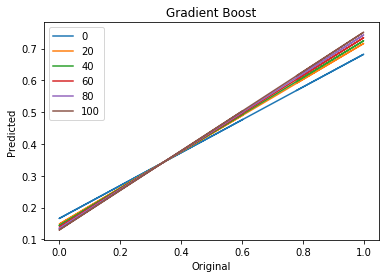

Overall R^2:
0.7922629924941087


In [30]:
# Define outcome and predictors.
y = df['song.hotttnesss']
X = df.loc[:, ~df.columns.isin(['song.hotttnesss'])]

# Make the categorical variable 'country' into dummies.
#X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Store values from loops.
preds = pd.DataFrame()
labels = []

uniquex = df['song.hotttnesss'].unique()

# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
for m in range(0, 101):
    
    # Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X,y)
    
    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    # Residuals.
    y = y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(df['song.hotttnesss'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Gradient Boost')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['song.hotttnesss'], predicted)[0, 1])

In [31]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.clf = ensemble.GradientBoostingClassifier(**params)
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)


# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
print(table_train)


col_0               0    1   All
song_hotttnesss                 
0                6454  166  6620
1                 789  591  1380
All              7243  757  8000


In [32]:
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.02075
Percent Type II errors: 0.098625

Test set accuracy:
Percent Type I errors: 0.044
Percent Type II errors: 0.1195


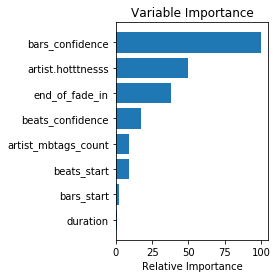

In [33]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

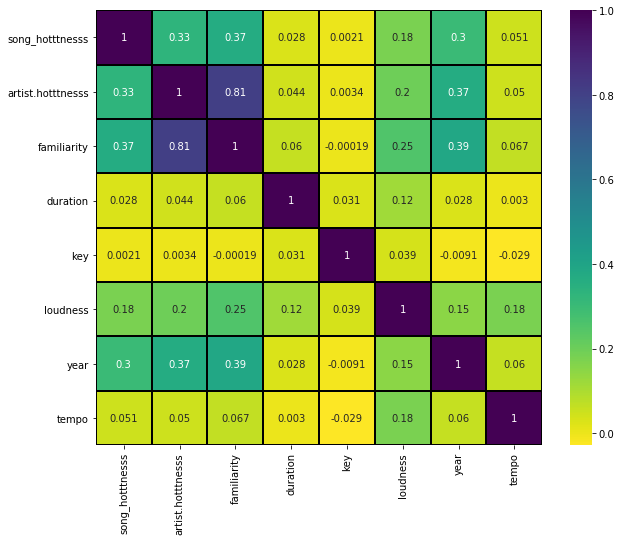

In [34]:
plt.figure(figsize=(10,8))
correlations = music.corr()
matrix = sns.heatmap(correlations,annot=True,linecolor='k',linewidth=1,cmap='viridis_r')

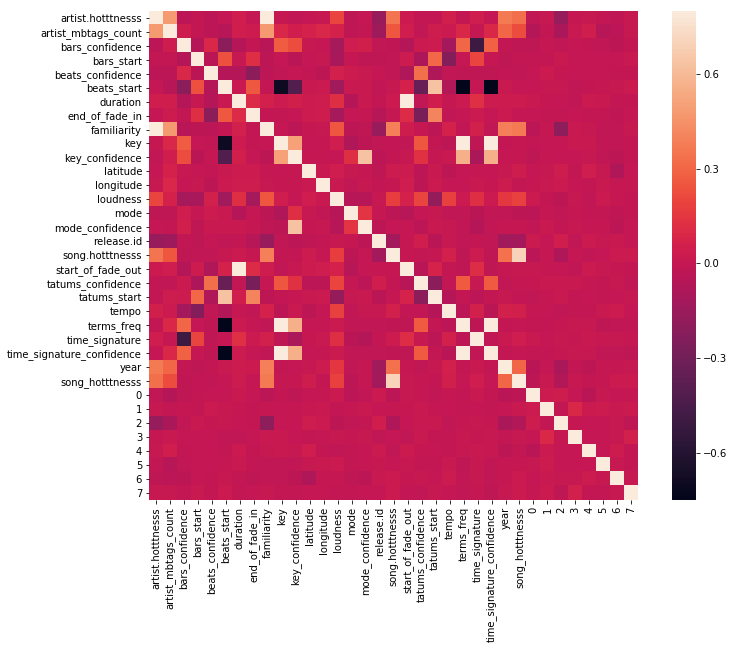

In [35]:
# Make the correlation matrix.
cor = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(cor, vmax=.8, square=True)
plt.show()


In [36]:
# Statsmodel logistic regression

# Declare predictors.
y_statsmod = df['song.hotttnesss']
x_statsmod = df.iloc[:,:-1]

# The Statsmodels formulation requires a column with constant value 1 that will act as the intercept.
x_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(y_statsmod, x_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.498419
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:        song.hotttnesss   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9965
Method:                           MLE   Df Model:                           34
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                 -0.1878
Time:                        18:20:44   Log-Likelihood:                -4984.2
converged:                       True   LL-Null:                       -4196.1
                                        LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
artist.hotttnesss            -0.0300      0.281     -0.107      0.915      -0

In [37]:
#The Statsmodels formulation requires a column with constant value 1 that will act as the intercept.

X_train['intercept'] = 1
#Declare and fit the model.

logit = sm.Logit(y_train, X_train) 
result = logit.fit() 
#predictions = result.predict( y_test) # vs x_test
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.362378
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        song_hotttnesss   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                  0.2119
Time:                        18:20:44   Log-Likelihood:                -2899.0
converged:                       True   LL-Null:                       -3678.6
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
artist.hotttnesss     0.7568      0.446      1.696      0.090      -0.118       1.631
duration

In [38]:
ypred = result.predict(X_train) 
print(ypred)


0       0.066412
1       0.257740
2       0.037792
3       0.275103
4       0.347814
5       0.057712
6       0.036391
7       0.201656
8       0.078362
9       0.071680
10      0.019870
11      0.064200
12      0.081260
13      0.004933
14      0.466184
15      0.270355
16      0.022344
17      0.022498
18      0.424772
19      0.016988
20      0.018392
21      0.039843
22      0.122512
23      0.627901
24      0.090982
25      0.092627
26      0.072759
27      0.133759
28      0.216412
29      0.050594
          ...   
7970    0.057166
7971    0.293357
7972    0.111804
7973    0.267865
7974    0.065313
7975    0.242600
7976    0.519336
7977    0.441811
7978    0.149672
7979    0.027276
7980    0.177549
7981    0.180804
7982    0.538833
7983    0.071772
7984    0.077300
7985    0.105439
7986    0.013169
7987    0.437959
7988    0.573631
7989    0.034468
7990    0.037268
7991    0.043617
7992    0.051147
7993    0.301584
7994    0.005908
7995    0.014084
7996    0.029739
7997    0.0154

In [39]:

print(X_train.head())

   artist.hotttnesss   duration  familiarity  key  loudness    tempo  \
0           0.401998  218.93179     0.581794  1.0   -11.197   92.198   
1           0.417500  148.03546     0.630630  6.0    -9.843  121.274   
2           0.343428  177.47546     0.487357  8.0    -9.689  100.070   
3           0.454231  233.40363     0.630382  0.0    -9.013  119.293   
4           0.401724  209.60608     0.651046  2.0    -4.501  129.738   

   time_signature  year  intercept  
0             4.0     0          1  
1             4.0  1969          1  
2             1.0     0          1  
3             4.0  1982          1  
4             4.0  2007          1  


In [40]:
X_train['intercept'] = 1 #Declare and fit the model.

logit = sm.Logit(y_train, X_train) 
result = logit.fit()

print(result.summary())

ypred = result.predict(X_train)
print (len(ypred))
print (len(y_test))


#table_test = pd.crosstab(y_test, ypred, margins=True) 
#print(table_train)


Optimization terminated successfully.
         Current function value: 0.362378
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        song_hotttnesss   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                            8
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                  0.2119
Time:                        18:20:47   Log-Likelihood:                -2899.0
converged:                       True   LL-Null:                       -3678.6
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
artist.hotttnesss     0.7568      0.446      1.696      0.090      -0.118       1.631
duration

In [41]:
df.duration.mode()

0    426.88935
dtype: float64

In [42]:
df.time_signature.mode()

0    4.0
dtype: float64

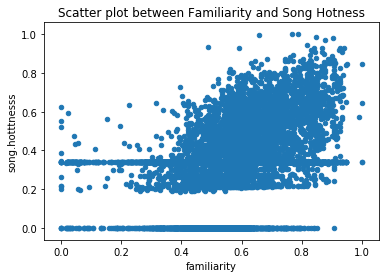

In [43]:
df.plot.scatter(x='familiarity', y='song.hotttnesss', title= "Scatter plot between Familiarity and Song Hotness");

plt.show(block=True)

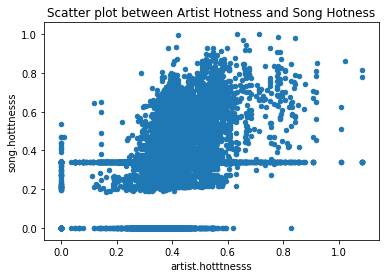

In [44]:
df.plot.scatter(x='artist.hotttnesss', y='song.hotttnesss', title= "Scatter plot between Artist Hotness and Song Hotness");

plt.show(block=True)

In [45]:
df['artist.hotttnesss'].mean()

0.38555220328260087

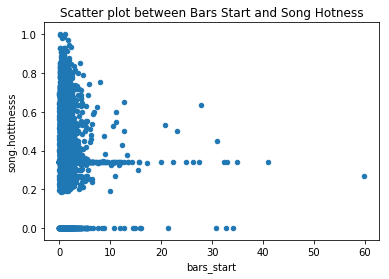

In [46]:
df.plot.scatter(x='bars_start', y='song.hotttnesss', title= "Scatter plot between Bars Start and Song Hotness");

plt.show(block=True)

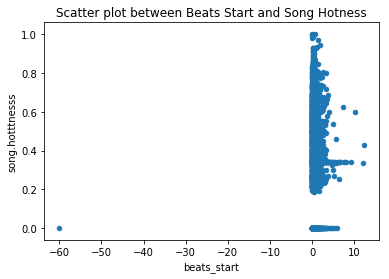

In [47]:
df.plot.scatter(x='beats_start', y='song.hotttnesss', title= "Scatter plot between Beats Start and Song Hotness");

plt.show(block=True)

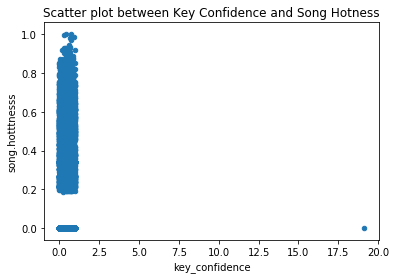

In [48]:
df.plot.scatter(x='key_confidence', y='song.hotttnesss', title= "Scatter plot between Key Confidence and Song Hotness");

plt.show(block=True)

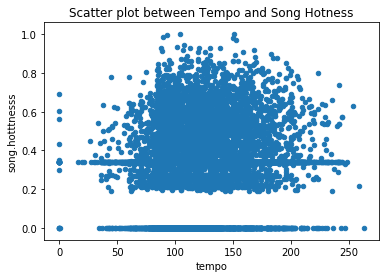

In [49]:
df.plot.scatter(x='tempo', y='song.hotttnesss', title= "Scatter plot between Tempo and Song Hotness");

plt.show(block=True)

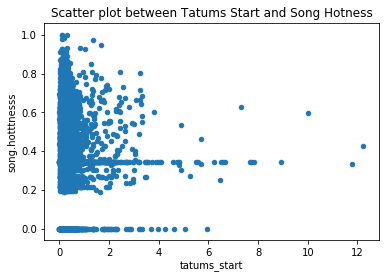

In [50]:
df.plot.scatter(x='tatums_start', y='song.hotttnesss', title= "Scatter plot between Tatums Start and Song Hotness");

plt.show(block=True)

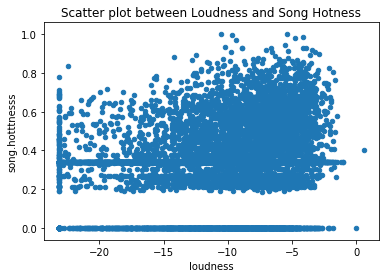

In [51]:
df.plot.scatter(x='loudness', y='song.hotttnesss', title= "Scatter plot between Loudness and Song Hotness");

plt.show(block=True)

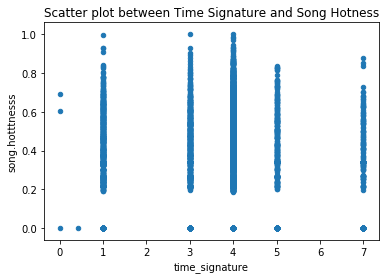

In [52]:
df.plot.scatter(x='time_signature', y='song.hotttnesss', title= "Scatter plot between Time Signature and Song Hotness");

plt.show(block=True)

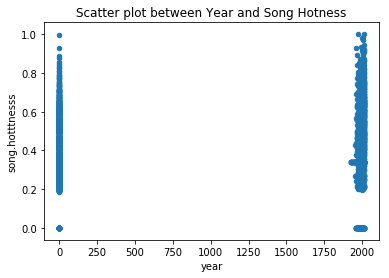

In [53]:
df.plot.scatter(x='year', y='song.hotttnesss', title= "Scatter plot between Year and Song Hotness");

plt.show(block=True)

In [54]:
df.familiarity.mean()

0.5654557054013589

In [63]:
year = df['year']
year = year[year > 0]
year.mode()

0    2006
dtype: int64